In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from robot_model import *

In [160]:
robot = CDPR4(pos=np.array([0,0,1000]))

def u(t):
    return  g/4*np.ones((4,1))#20* np.sin(t)*np.ones((4,1))

traj = []

# Time array
dt = 0.05
t_f = 20
t = np.linspace(0, t_f, int(t_f/dt))

In [161]:
# Arrays to store results
positions = []
velocities = []
X = np.array([0,0,1000,0,0,0], dtype=np.float64).reshape((6,1)) 

# Simulation loop
for time in t:
    # Calculate acceleration
    dXdt = robot.B() @ u(time) + np.array([0, 0, 0, 0, 0, -g]).reshape((6,1))
    # Update velocities (last 3 elements of X)
    X[3:] += dXdt[3:] * dt
    
    # Update positions (first 3 elements of X)
    X[:3] += X[3:] * dt
    
    # TODO: change robot config each time step
    
    # Store results
    positions.append(X[:3].flatten())
    velocities.append(X[3:].flatten())

In [162]:
# Convert results to numpy arrays
positions = np.array(positions)
velocities = np.array(velocities)

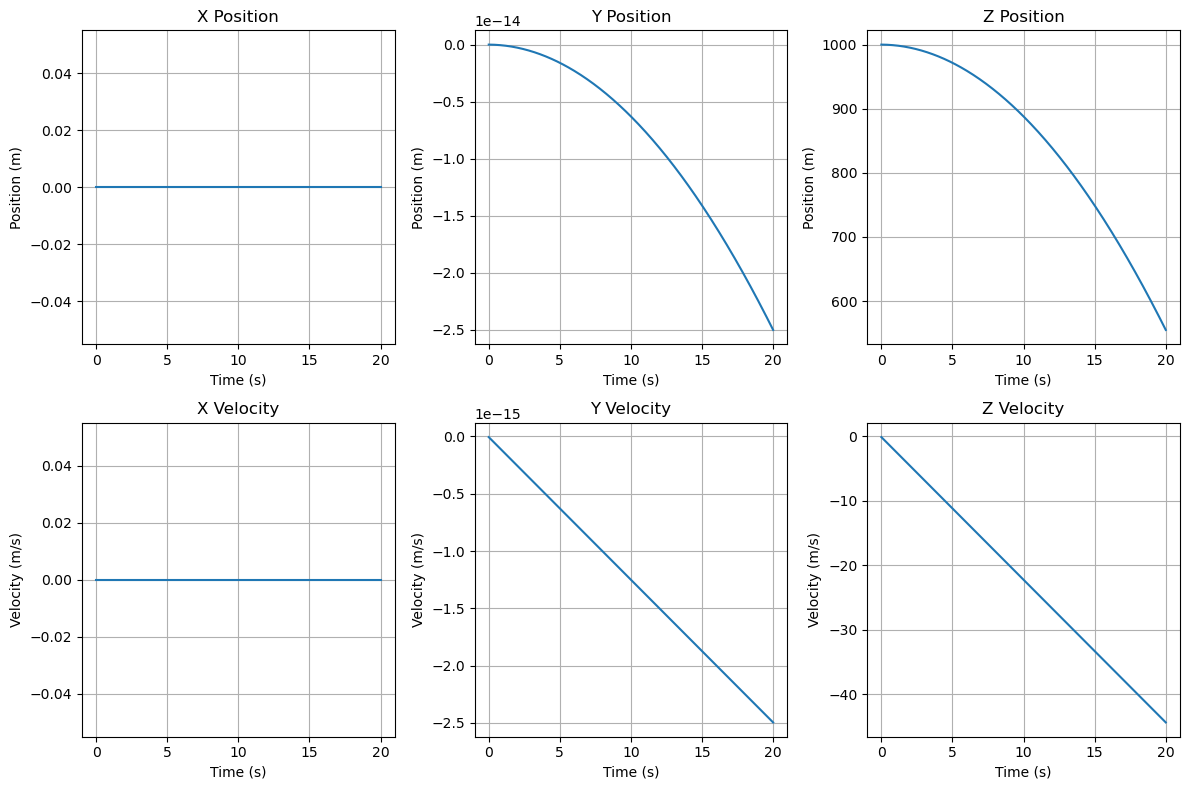

X - Max position: 0.00 m, Min position: 0.00 m
Y - Max position: -0.00 m, Min position: -0.00 m
Z - Max position: 999.99 m, Min position: 555.05 m


In [163]:
# Plotting
plt.figure(figsize=(12, 8))

# Position plots
for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(2, 3, i+1)
    plt.plot(t, positions[:, i])
    plt.title(f'{axis} Position')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.grid(True)

# Velocity plots
for i, axis in enumerate(['X', 'Y', 'Z']):
    plt.subplot(2, 3, i+4)
    plt.plot(t, velocities[:, i])
    plt.title(f'{axis} Velocity')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print max and min positions
for i, axis in enumerate(['X', 'Y', 'Z']):
    print(f"{axis} - Max position: {np.max(positions[:, i]):.2f} m, Min position: {np.min(positions[:, i]):.2f} m")